<a href="https://colab.research.google.com/github/ibarajas248/proyecto_bootcamp_analisis_de_datos/blob/master/Estadisticas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install mysql-connector-python

In [7]:
import mysql.connector
from mysql.connector import Error

import pandas as pd

try:
    # Establecer la conexión a la base de datos
    conn = mysql.connector.connect(
        host='bnlrjjogqqtrux5dkhx3-mysql.services.clever-cloud.com',
        port=3306,
        user='ug9k8pdx4fu2lc9p',
        password='MiyaArHakCa5tGKIRcec',
        database='bnlrjjogqqtrux5dkhx3'
    )

    if conn.is_connected():
        print('Conexión exitosa a la base de datos.')

        # Crear un DataFrame desde la tabla 'partidos'
        df_estadisticas = pd.read_sql('SELECT * FROM estadisticas', conn)


        df_estadisticas.head()



except Error as e:
    print(f'Error al conectar a la base de datos: {e}')

Conexión exitosa a la base de datos.


<ipython-input-7-a303767e15ce>:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_estadisticas = pd.read_sql('SELECT * FROM estadisticas', conn)


In [8]:
 df_estadisticas.head()

,id,id_partido,equipo,intervenciones_portero,tarjetas_amarillas,tarjeta_roja,faltas_recibidas,faltas_cometidas,balones_perdidos,balones_recuperados,fuera_de_juego_en_contra
0,4597,10002,Montpellier,2,2,0,15,15,144,73,1
1,4598,10002,Dijon,6,2,0,21,21,131,63,0
2,4599,10003,Angers,1,2,0,20,20,165,68,1
3,4600,10003,Nîmes,4,0,1,12,12,155,64,1
4,4601,10004,Lille,1,1,0,12,12,125,56,1


In [9]:
 df_estadisticas.columns

Index(['id', 'id_partido', 'equipo', 'intervenciones_portero',
       'tarjetas_amarillas', 'tarjeta_roja', 'faltas_recibidas',
       'faltas_cometidas', 'balones_perdidos', 'balones_recuperados',
       'fuera_de_juego_en_contra'],
      dtype='object')

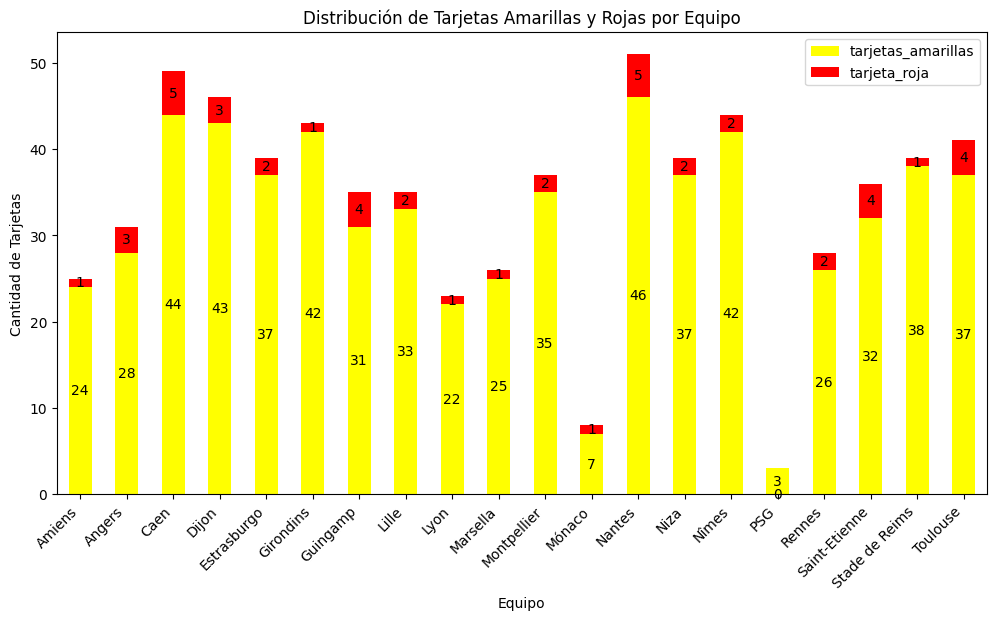

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por equipo y sumar tarjetas amarillas y rojas
tarjetas_por_equipo = df_estadisticas.groupby('equipo')[['tarjetas_amarillas', 'tarjeta_roja']].sum()

# Crear gráfico de barras para tarjetas amarillas y rojas
ax = tarjetas_por_equipo.plot(kind='bar', stacked=True, figsize=(12, 6), color=['yellow', 'red'])
plt.title('Distribución de Tarjetas Amarillas y Rojas por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Tarjetas')
plt.xticks(rotation=45, ha='right')
#plt.grid(True)

# Añadir números de tarjetas dentro de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Mostrar el gráfico
plt.show()



In [21]:
# Agrupar por equipo y sumar faltas cometidas y recibidas
faltas_por_equipo = df_estadisticas.groupby('equipo')[['faltas_cometidas']].sum()
faltas_por_equipo.head()


,faltas_cometidas
equipo,
Amiens,242
Angers,259
Caen,363
Dijon,365
Estrasburgo,271


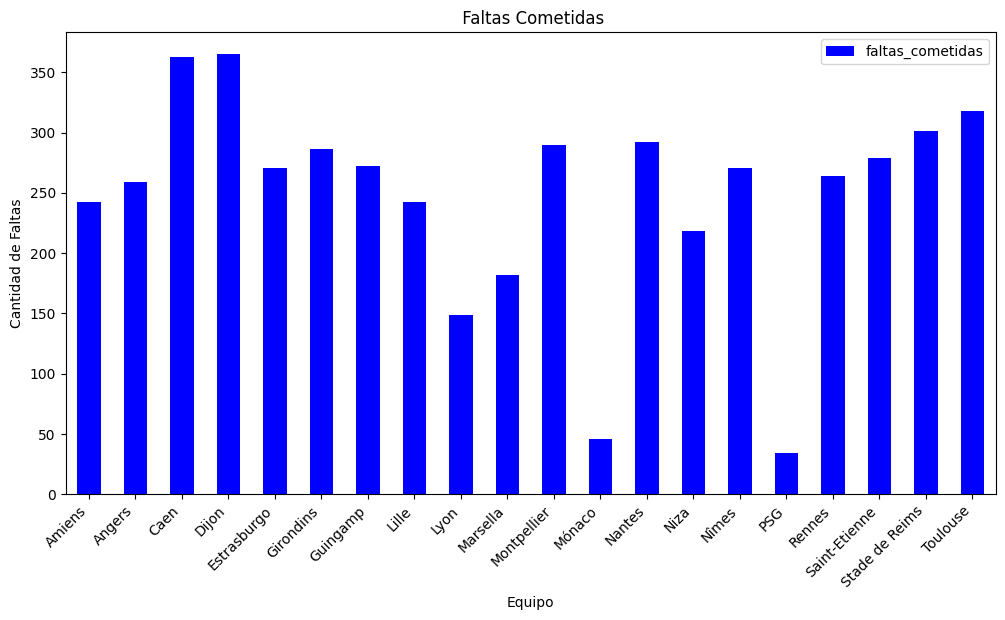

In [22]:
# Crear gráfico de barras comparativo para faltas cometidas y recibidas
faltas_por_equipo.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])
plt.title(' Faltas Cometidas')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Faltas')
plt.xticks(rotation=45, ha='right')
#plt.grid(True)

# Mostrar el gráfico
plt.show()


<Figure size 1200x600 with 0 Axes>

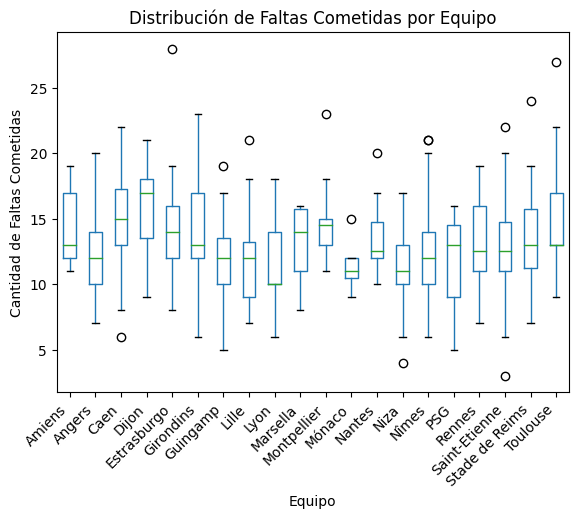

In [25]:
# Crear gráfico de caja para faltas cometidas por equipo
plt.figure(figsize=(12, 6))
df_estadisticas.boxplot(column='faltas_cometidas', by='equipo', grid=False)
plt.title('Distribución de Faltas Cometidas por Equipo')
plt.suptitle('')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Faltas Cometidas')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()




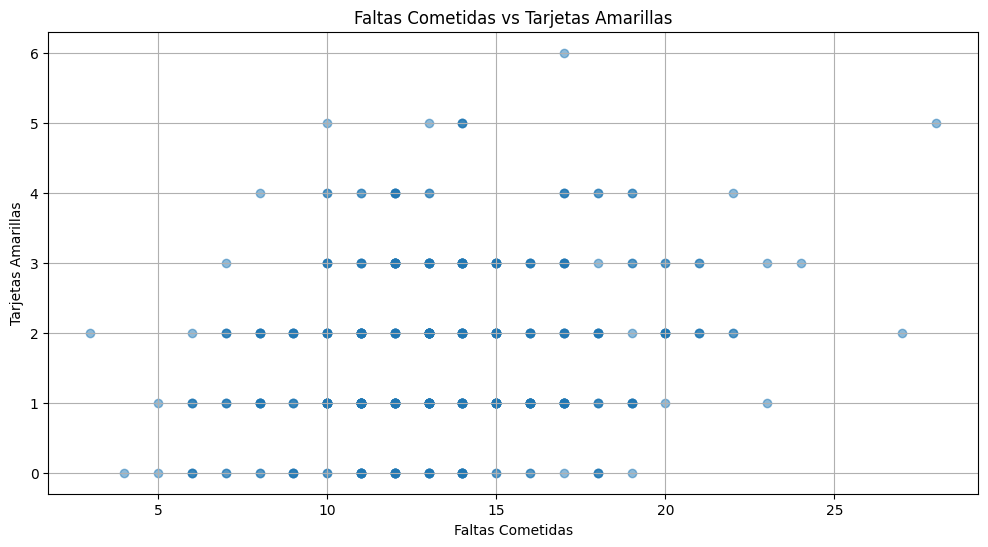

In [26]:
# Crear gráfico de dispersión entre faltas cometidas y tarjetas amarillas
plt.figure(figsize=(12, 6))
plt.scatter(df_estadisticas['faltas_cometidas'], df_estadisticas['tarjetas_amarillas'], alpha=0.5)
plt.title('Faltas Cometidas vs Tarjetas Amarillas')
plt.xlabel('Faltas Cometidas')
plt.ylabel('Tarjetas Amarillas')
plt.grid(True)

# Mostrar el gráfico
plt.show()


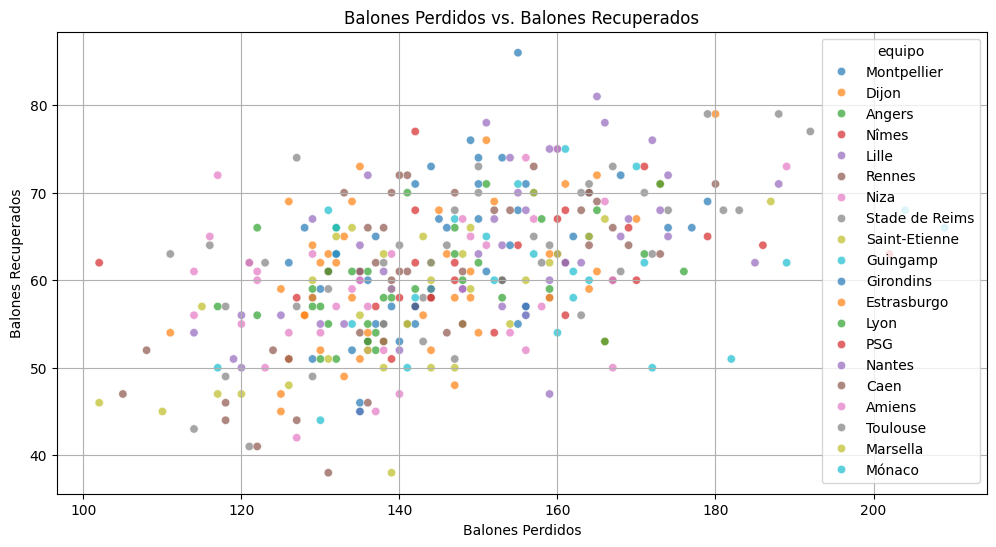

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con Seaborn para balones perdidos vs. balones recuperados
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_estadisticas,
    x='balones_perdidos',
    y='balones_recuperados',
    hue='equipo',  # Colorea los puntos según el equipo
    palette='tab10',  # Paleta de colores para diferentes equipos
    alpha=0.7  # Transparencia de los puntos
)
plt.title('Balones Perdidos vs. Balones Recuperados')
plt.xlabel('Balones Perdidos')
plt.ylabel('Balones Recuperados')
plt.grid(True)

# Mostrar el gráfico
plt.show()



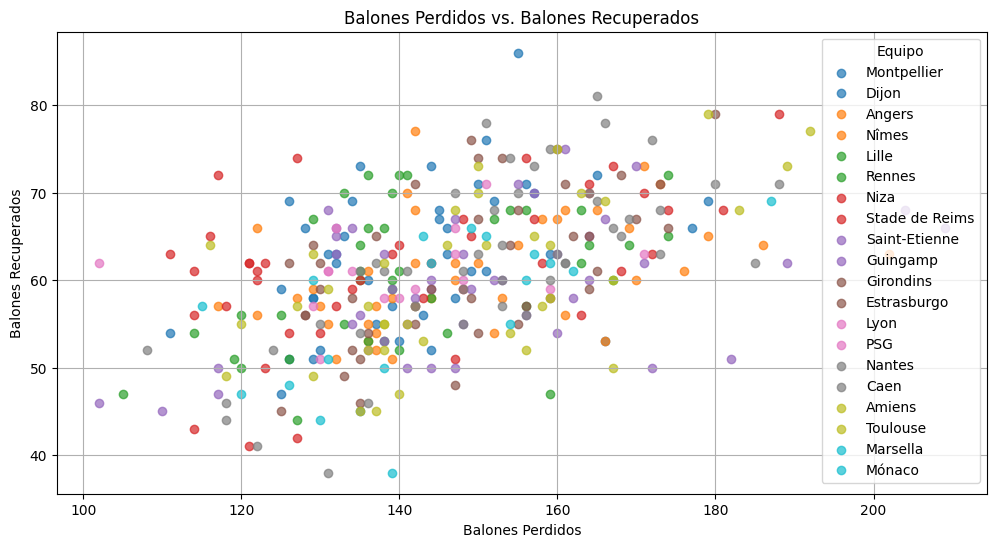

In [51]:
import matplotlib.pyplot as plt

# Obtener una lista de equipos únicos
equipos = df_estadisticas['equipo'].unique()

# Crear un diccionario de colores para cada equipo
colores = plt.get_cmap('tab10', len(equipos))  # Cambia la paleta si es necesario
color_dict = {equipo: colores(i) for i, equipo in enumerate(equipos)}

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))

for equipo in equipos:
    # Filtrar datos para el equipo actual
    df_equipo = df_estadisticas[df_estadisticas['equipo'] == equipo]

    # Plotear los puntos para el equipo actual
    plt.scatter(
        df_equipo['balones_perdidos'],
        df_equipo['balones_recuperados'],
        alpha=0.7,
        color=color_dict[equipo],
        label=equipo
    )

plt.title('Balones Perdidos vs. Balones Recuperados')
plt.xlabel('Balones Perdidos')
plt.ylabel('Balones Recuperados')
plt.grid(True)
plt.legend(title='Equipo')

# Mostrar el gráfico
plt.show()


       id  id_partido equipo  intervenciones_portero  tarjetas_amarillas  \
1    4598       10002  Dijon                       6                   2   
16   4613       10013  Dijon                       0                   0   
37   4634       10025  Dijon                       3                   3   
54   4651       10036  Dijon                       2                   0   
68   4665       10045  Dijon                       3                   2   
89   4686       10056  Dijon                       2                   1   
107  4704       10074  Dijon                       2                   3   
123  4720       10082  Dijon                       1                   0   
140  4737       10095  Dijon                       1                   2   
159  4756       10105  Dijon                       2                   3   
180  4777       10136  Dijon                       0                   2   
195  4792       10146  Dijon                       1                   3   
206  4803   

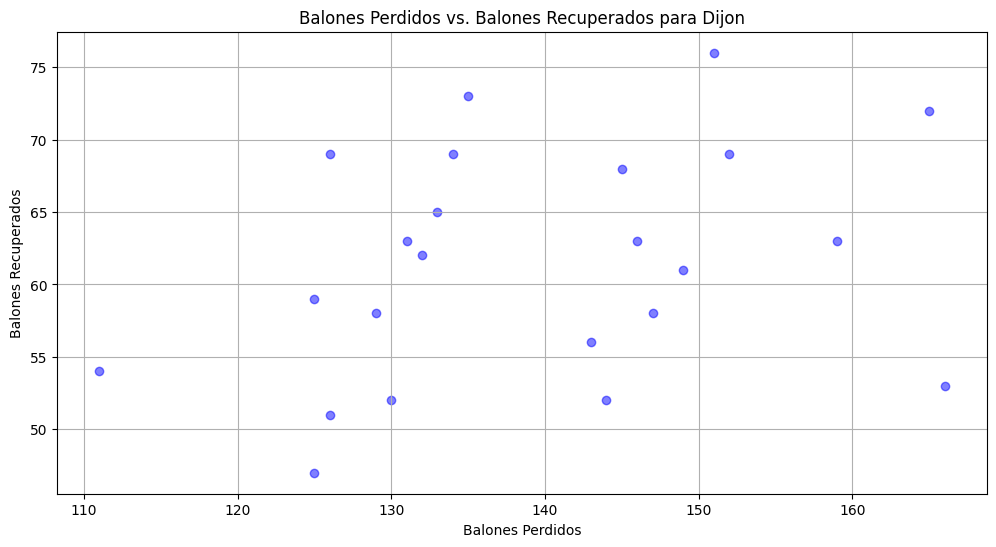

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que quieres analizar el equipo 'PSG'
equipo_interesado = 'Dijon'  # Reemplaza con el nombre del equipo deseado

# Filtrar el DataFrame para mostrar solo los datos del equipo seleccionado
df_equipo = df_estadisticas[df_estadisticas['equipo'] == equipo_interesado]

# Verificar los datos filtrados
print(df_equipo)

# Crear el gráfico de dispersión para balones perdidos vs. balones recuperados
plt.figure(figsize=(12, 6))
plt.scatter(df_equipo['balones_perdidos'], df_equipo['balones_recuperados'], alpha=0.5, color='blue')
plt.title(f'Balones Perdidos vs. Balones Recuperados para {equipo_interesado}')
plt.xlabel('Balones Perdidos')
plt.ylabel('Balones Recuperados')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Datos para Niza:
       id  id_partido equipo  intervenciones_portero  tarjetas_amarillas  \
6    4603       10005   Niza                       2                   1   
19   4616       10014   Niza                       3                   2   
36   4633       10025   Niza                       1                   2   
45   4642       10030   Niza                       9                   1   
62   4659       10040   Niza                       2                   4   
87   4684       10055   Niza                       3                   2   
93   4690       10061   Niza                       2                   2   
119  4716       10080   Niza                       1                   2   
146  4743       10099   Niza                       0                   3   
165  4762       10108   Niza                       9                   3   
184  4781       10138   Niza                       2                   1   
189  4786       10142   Niza                       2                   

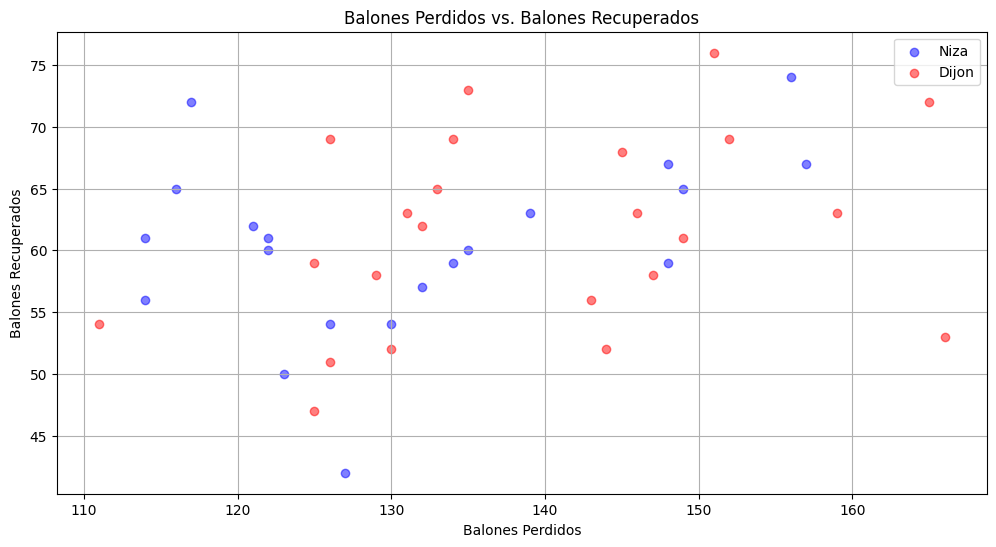

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Equipos de interés
equipo_1 = 'Niza'  # Reemplaza con el nombre del primer equipo deseado
equipo_2 = 'Dijon'  # Reemplaza con el nombre del segundo equipo deseado

# Filtrar el DataFrame para mostrar solo los datos de los equipos seleccionados
df_equipo_1 = df_estadisticas[df_estadisticas['equipo'] == equipo_1]
df_equipo_2 = df_estadisticas[df_estadisticas['equipo'] == equipo_2]

# Verificar los datos filtrados
print(f"Datos para {equipo_1}:")
print(df_equipo_1)
print(f"Datos para {equipo_2}:")
print(df_equipo_2)

# Crear el gráfico de dispersión para balones perdidos vs. balones recuperados
plt.figure(figsize=(12, 6))

# Gráfico para el primer equipo
plt.scatter(df_equipo_1['balones_perdidos'], df_equipo_1['balones_recuperados'], alpha=0.5, color='blue', label=equipo_1)

# Gráfico para el segundo equipo
plt.scatter(df_equipo_2['balones_perdidos'], df_equipo_2['balones_recuperados'], alpha=0.5, color='red', label=equipo_2)

plt.title('Balones Perdidos vs. Balones Recuperados')
plt.xlabel('Balones Perdidos')
plt.ylabel('Balones Recuperados')
plt.grid(True)
plt.legend()  # Añade una leyenda para identificar los equipos

# Mostrar el gráfico
plt.show()


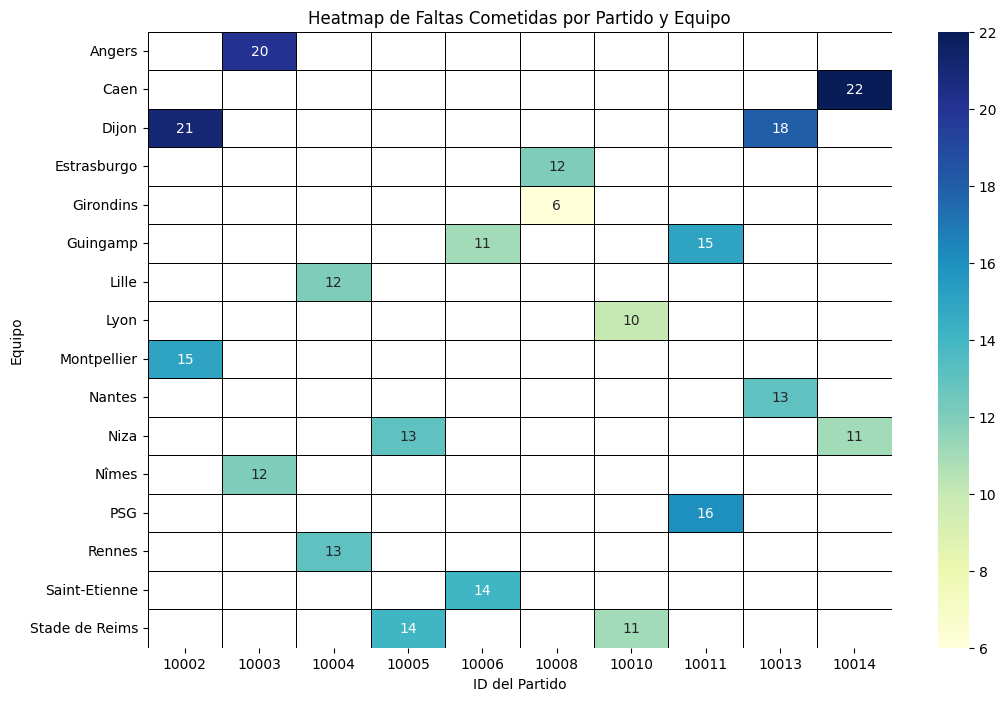

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra para mostrar solo los primeros 10 partidos
partidos_10 = df_estadisticas['id_partido'].unique()[:10]
df_filtrado = df_estadisticas[df_estadisticas['id_partido'].isin(partidos_10)]

# Crear una tabla de calor de faltas cometidas por partido
heatmap_data = df_filtrado.pivot_table(index='equipo', columns='id_partido', values='faltas_cometidas', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='YlGnBu',
    cbar=True,
    linewidths=0.5,  # Grosor de las líneas de separación
    linecolor='black'  # Color de las líneas de separación
)
plt.title('Heatmap de Faltas Cometidas por Partido y Equipo')
plt.xlabel('ID del Partido')
plt.ylabel('Equipo')

# Mostrar el gráfico
plt.show()



       id  id_partido  equipo  intervenciones_portero  tarjetas_amarillas  \
2    4599       10003  Angers                       1                   2   
21   4618       10015  Angers                       1                   2   
50   4647       10034  Angers                       4                   0   
69   4666       10045  Angers                       2                   2   
82   4679       10053  Angers                       0                   1   
110  4707       10076  Angers                       4                   3   
124  4721       10083  Angers                       2                   1   
137  4734       10093  Angers                       4                   0   
150  4747       10101  Angers                       3                   2   
175  4772       10132  Angers                       7                   3   
190  4787       10143  Angers                       2                   1   
199  4796       10151  Angers                       5                   1   

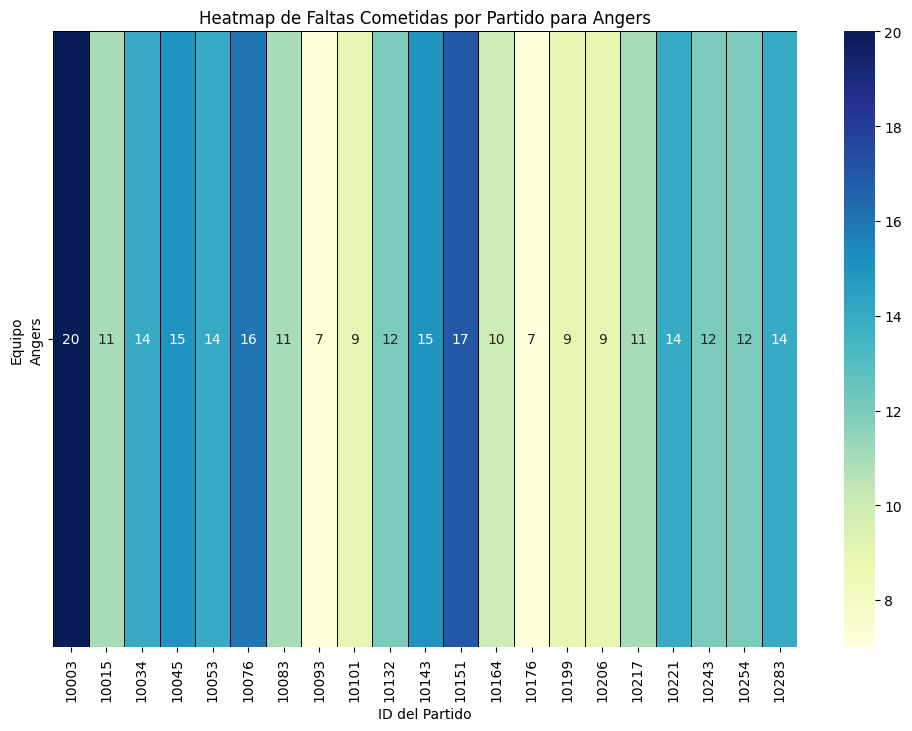

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar el equipo de interés
equipo_interesado = 'Angers'  # Reemplaza con el nombre del equipo deseado

# Filtrar el DataFrame para mostrar solo los partidos en los que ha jugado el equipo seleccionado
df_filtrado = df_estadisticas[df_estadisticas['equipo'] == equipo_interesado]

# Imprimir el DataFrame filtrado para verificar los datos
print(df_filtrado)

# Crear una tabla de calor de faltas cometidas por partido para el equipo seleccionado
heatmap_data = df_filtrado.pivot_table(index='equipo', columns='id_partido', values='faltas_cometidas', aggfunc='sum')

# Imprimir la tabla de calor para verificar los datos
print(heatmap_data)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='YlGnBu',
    cbar=True,
    linewidths=0.5,  # Grosor de las líneas de separación
    linecolor='black'  # Color de las líneas de separación
)
plt.title(f'Heatmap de Faltas Cometidas por Partido para {equipo_interesado}')
plt.xlabel('ID del Partido')
plt.ylabel('Equipo')

# Mostrar el gráfico
plt.show()



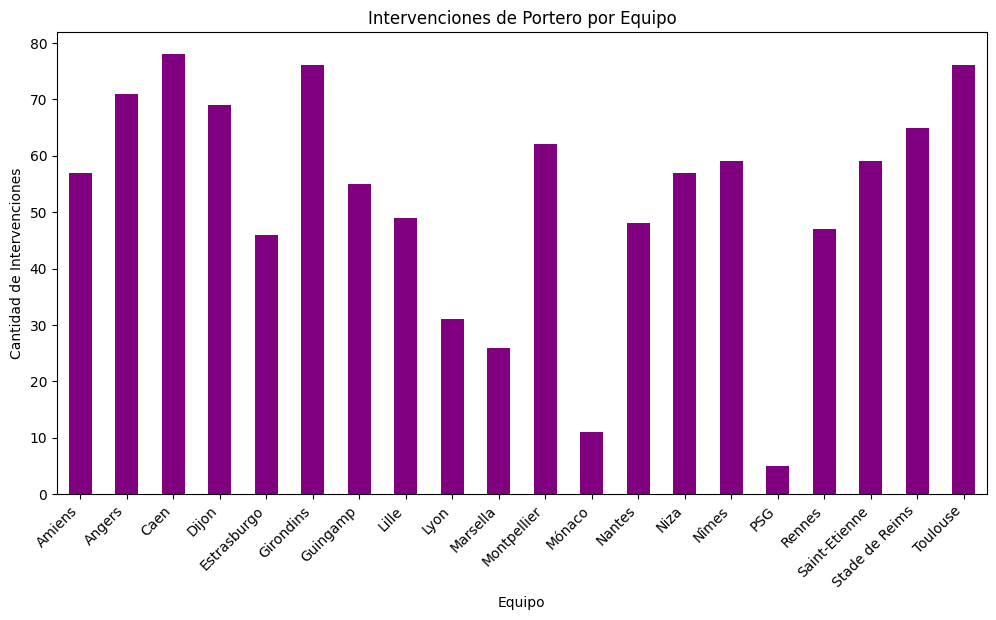

In [44]:
# Agrupar por equipo y sumar intervenciones del portero
intervenciones_por_equipo = df_estadisticas.groupby('equipo')['intervenciones_portero'].sum()

# Crear gráfico de barras para intervenciones de portero
intervenciones_por_equipo.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Intervenciones de Portero por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Intervenciones')
plt.xticks(rotation=45, ha='right')
#plt.grid(True)

# Mostrar el gráfico
plt.show()
